**IMPORTING LIBRARIES**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
import seaborn as sns

**LOAD THE DATASET**

In [ ]:

df =  pd.read_csv(r"/content/water_dataX (1).csv", encoding = 'unicode_escape')


**VIEWING DATASET**

In [ ]:
df.head()


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


**IDENTIFY THE NULL VALUES IN THE DATASET**

In [ ]:
df.isnull()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1986,False,False,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False,False,False
1988,False,False,False,False,False,False,False,False,False
1989,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()


,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Temp                              1991 non-null   object
 1   D.O. (mg/l)                       1991 non-null   object
 2   PH                                1991 non-null   object
 3   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 4   B.O.D. (mg/l)                     1991 non-null   object
 5   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 6   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 7   TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 8   year                              1991 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 140.1+ KB


In [ ]:
df.shape

(1991, 9)

**FIND THE DATASET TYPE**

In [ ]:
df.dtypes

Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [ ]:
df.isnull().sum()

Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['Temp']=pd.to_numeric(df['Temp'],errors="coerce")

df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'], errors='coerce')

df['PH']=pd.to_numeric(df['PH'],errors='coerce')

df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')

df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')

df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce') 

df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

df.dtypes

Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [ ]:
df.isnull().sum()

Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [ ]:
df['Temp'].fillna(df['Temp'].mean(),inplace=True)

df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)

df['PH'].fillna(df['PH'].mean(),inplace=True)

df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True) 

df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)

df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df[ 'NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)

df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [ ]:
df.fillna(df.mean(), inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [ ]:

df.describe()


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,5.336872e+05,2010.038172
std,3.287652,1.322515,1875.150167,5517.289887,29.080653,3.852301,1.375409e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,2003.000000
25%,25.000000,5.950000,6.900000,79.000000,1.200000,0.280000,1.180000e+02,2008.000000
50%,27.000000,6.700000,7.300000,187.630000,1.900000,0.620000,5.420000e+02,2011.000000
75%,28.300000,7.200000,7.700000,620.500000,3.900000,1.623079,2.929000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,5.110909e+08,2014.000000


#Let us drop some unwanted values


In [ ]:

df.drop(["FECAL COLIFORM (MPN/100ml)"], axis=1, inplace=True)



In [ ]:
#Rename the columns

In [ ]:
print(df.columns)

Index(['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'TOTAL COLIFORM (MPN/100ml)Mean',
       'year'],
      dtype='object')


In [ ]:
df.columns=['nDO','co','bod','na','tc','year','ph','temp']
df.head()

,nDO,co,bod,na,tc,year,ph,temp
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


In [ ]:
df.head()

,nDO,co,bod,na,tc,year,ph,temp
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


calculating water quality index

In [ ]:
df['ph' ]=df.ph.apply(lambda x: (100 if (8.5>=x>=7)

                         else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)

                             else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                
                                else(40 if (9>=x>=8.8) or (6.7>=x>6.5)

                                     else 0)))))

In [ ]:
#calculation of dissolved oxygen

df['nDO']=df.nDO.apply(lambda x:(100 if (x>=6)

                            else(80 if (6>=x>=5.1) 

                                else(60 if (5>=x>=4.1) 

                                    else(40 if (4>=x>=3) 

                                           else 0)))))

In [ ]:
df['co']=df.co.apply(lambda x: (100 if (5>=x>=0)

                       else(80 if (50>=x>=5)

                          else(60 if (500>=x>=50)

                             else(40 if (10000>=x>=500)

                                else 0)))))

In [ ]:
#cale of B.D.O

df['bod']=df.bod.apply(lambda x: (100 if(3>=x>=0)

else(80 if (6>=x>=3)

else(60 if (80>=x>=6)

else(40 if (125>=x>=80)

else 0)))))

In [ ]:
#Calulation of nitrate

df['na']=df.na.apply(lambda x: (100 if (20>=x>=0)

                                  else(80 if (50>=x>=20)

                                     else(60 if (100>=x>=50)

                                         else(40 if (200>=x>=100)

                                                else 0)))))

In [ ]:
# calculate water quality index WQI

df['ph']=df.ph* 0.165

df['nDO']=df.nDO* 0.281

df['bod']=df.bod* 0.234


df['na']=df.na * 0.028

df['co']=df.co * 0.281

df['wqi']=df.ph+df.nDO+df.bod+df.na+df.co

df

,nDO,co,bod,na,tc,year,ph,temp,wqi
0,28.1,22.48,14.04,0.00,6.940049,0.100000,0.0,2014,64.62
1,28.1,22.48,14.04,1.12,2.000000,0.200000,0.0,2014,65.74
2,28.1,22.48,14.04,1.12,1.700000,0.100000,0.0,2014,65.74
3,28.1,22.48,14.04,1.68,3.800000,0.500000,0.0,2014,66.30
4,28.1,22.48,14.04,1.68,1.900000,0.400000,0.0,2014,66.30
...,...,...,...,...,...,...,...,...,...
1986,28.1,22.48,0.00,2.80,2.700000,0.518000,0.0,2003,53.38
1987,28.1,22.48,0.00,2.80,2.600000,0.155000,0.0,2003,53.38
1988,28.1,22.48,9.36,2.80,1.200000,1.623079,0.0,2003,62.74
1989,28.1,22.48,9.36,2.80,1.300000,1.623079,0.0,2003,62.74


In [ ]:
average=df.groupby('year')['wqi'].mean()

In [ ]:
average.head()


year
0.00    66.350244
0.01    66.860000
0.02    69.725000
0.03    67.613333
0.04    73.990000
Name: wqi, dtype: float64

**Data visualisation**

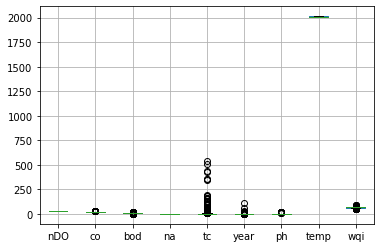

In [ ]:
df.boxplot()

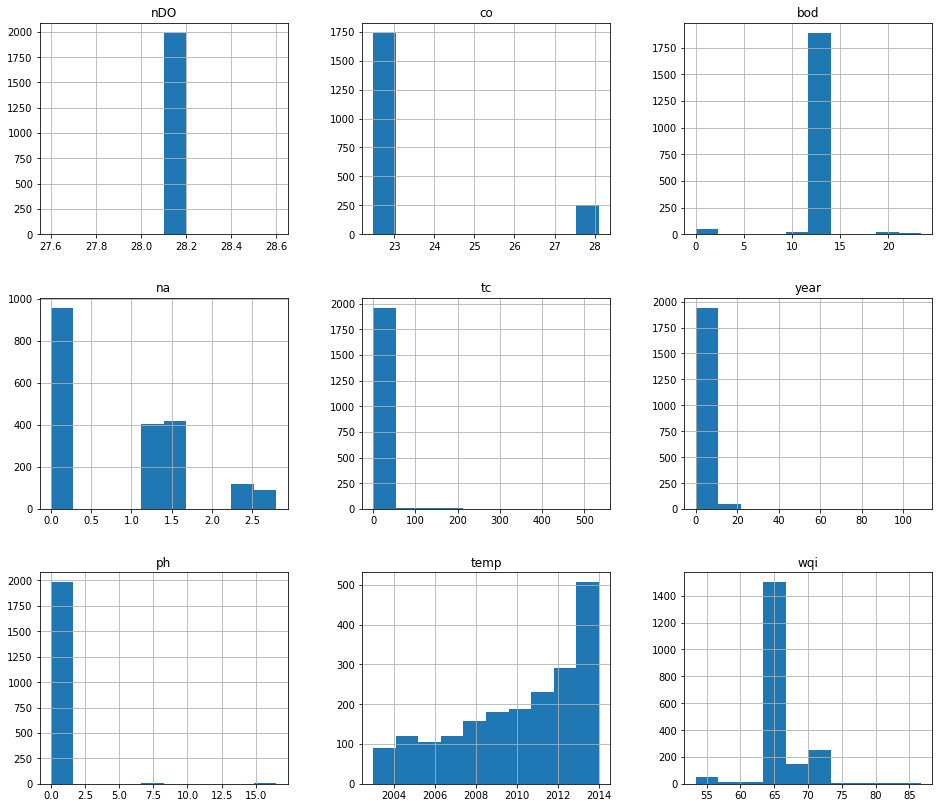

In [ ]:
df.hist(figsize=(16,14))
plt.show()

In [ ]:
df.wqi.value_counts()

64.62    726
66.30    392
65.74    381
70.24    200
66.86    115
53.38     49
67.42     26
71.36     20
71.92     18
62.74     14
59.94      8
70.98      8
73.98      7
69.30      6
86.74      3
71.54      3
76.84      2
81.12      2
74.92      2
82.24      2
59.00      2
70.42      1
71.22      1
83.36      1
72.48      1
79.60      1
Name: wqi, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


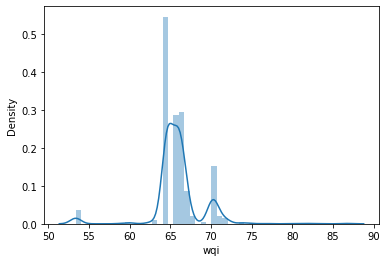

In [ ]:
sns.distplot(df['wqi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


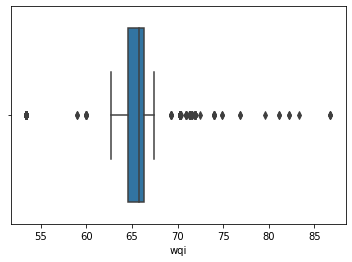

In [ ]:
sns.boxplot(df.wqi)

In [ ]:
q1=df.wqi.quantile(0.25)
q3=df.wqi.quantile(0.75)


In [ ]:
IQR=q3-q1

In [ ]:
upper_limit=q3 + 1.5*IQR
lower_limit=q3 - 1.5*IQR


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


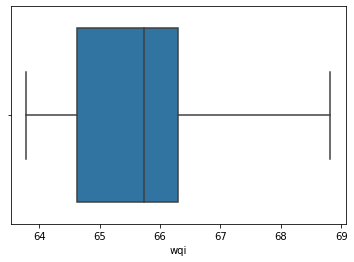

In [ ]:
df['wqi']=np.where(df['wqi']>upper_limit,upper_limit,np.where(df['wqi']<lower_limit,lower_limit,df['wqi']))
sns.boxplot(df.wqi)

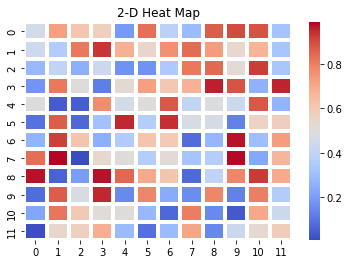

In [ ]:
df = np.random.rand( 12 , 12)
ax = sns.heatmap( df , linewidth = 3, cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.year=le.fit_transform(df.year)
df.bod=le.fit_transform(df.bod)
df.temp=le.fit_transform(df.temp)
df.na=le.fit_transform(df.na)
df.ph=le.fit_transform(df.ph)
df.co=le.fit_transform(df.co)
df.nDO=le.fit_transform(df.nDO)
df.tc=le.fit_transform(df.tc)
df.wqi=le.fit_transform(df.wqi)
df.head()

AttributeError: ignored

In [ ]:
df.head()

,nDO,co,bod,na,tc,year,ph,temp
0,163,98,114,281,215,12,27,11
1,155,66,85,266,97,47,888,11
2,151,81,55,252,80,12,844,11
3,154,67,55,83,156,136,890,11
4,151,67,95,113,94,112,849,11


In [ ]:
df.isnull().sum()

nDO     0
co      0
bod     0
na      0
tc      0
year    0
ph      0
temp    0
dtype: int64

AttributeError: ignored

In [ ]:
X=df.iloc[:,:-1]
X.head()
#Y=df.outcome

,nDO,co,bod,na,tc,year,ph
0,163,98,114,281,215,12,27
1,155,66,85,266,97,47,888
2,151,81,55,252,80,12,844
3,154,67,55,83,156,136,890
4,151,67,95,113,94,112,849


In [ ]:
Y=df.wqi

AttributeError: ignored

In [ ]:
X=X.transpose()
Y=Y.transpose()

In [ ]:
X.shape


(8, 1991)

In [ ]:
Y.transpose

<function ndarray.transpose>

In [ ]:
Y.shape


(0, 1991)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
Y_train = sc.fit_transform(X_train)
Y_test = sc.transform(X_test)

In [ ]:
df.head()

,nDO,co,bod,na,tc,year,ph,temp
0,163,98,114,281,215,12,27,11
1,155,66,85,266,97,47,888,11
2,151,81,55,252,80,12,844,11
3,154,67,55,83,156,136,890,11
4,151,67,95,113,94,112,849,11


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=0)


ValueError: ignored

In [ ]:
X_train.shape

(1592, 8)

In [ ]:

Y_train.shape

(1592, 8)

In [ ]:
Y_test.shape

(399, 8)

In [ ]:



X_test.shape

(399, 8)

In [ ]:

from sklearn.ensemble import RandomForestRegressor

clf= RandomForestRegressor(n_estimators=10)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
 

In [ ]:
clf.fit(X_test,X_test)

RandomForestRegressor(n_estimators=10)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


MAE: 0.0005012531328320802
MSE: 5.012531328320803e-05
RMSE: 0.007079923254047888
